In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os


In [165]:
# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# Move one directory up
parent_directory = os.path.abspath(os.path.join(current_directory, ".."))

file_path=os.path.join(parent_directory,"marketing_campaign.csv")

Current directory: g:\Resume_Projects\clustering\Customer_github\Notebook\EDA


In [166]:
import pandas as pd

df = pd.read_csv(file_path, sep="\t")


Shape of Dataframe

In [167]:
df.shape

(2240, 29)

In [168]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#####  Data Overview

# Data Overview

## Personal Details
| Column             | Description                                  |
|--------------------|----------------------------------------------|
| ID                 | Customer identifier.                         |
| Year_Birth         | Year of birth of the customer.               |
| Education          | Educational qualification of the customer.  |
| Marital_Status     | Marital status of the customer.              |
| Income             | Income level of the customer.                |
| Kidhome            | Number of children in the household aged 0 to 5. |
| Teenhome           | Number of teenagers in the household aged 12 to 18. |
| Dt_Customer        | Date when the customer was enrolled.         |

## Products
| Column             | Description                                  |
|--------------------|----------------------------------------------|
| Recency            | Recency of the customer's last purchase.     |
| MntWines           | Amount spent on wines.                       |
| MntFruits          | Amount spent on fruits.                      |
| MntMeatProducts    | Amount spent on meat products.               |
| MntFishProducts    | Amount spent on fish products.               |
| MntSweetProducts   | Amount spent on sweet products.              |
| MntGoldProds       | Amount spent on gold products.               |

## Purchases
| Column                 | Description                                          |
|------------------------|------------------------------------------------------|
| NumDealsPurchases      | Number of purchases made with a discount or deal.    |
| NumWebPurchases        | Number of purchases made through the website.        |
| NumCatalogPurchases    | Number of purchases made through catalogs.           |
| NumStorePurchases      | Number of purchases made in physical stores.         |

## Campaign Details
| Column                | Description                                           |
|-----------------------|-------------------------------------------------------|
| NumWebVisitsMonth     | Number of web visits in a month.                      |
| AcceptedCmp3          | Acceptance of marketing campaign 3.                   |
| AcceptedCmp4          | Acceptance of marketing campaign 4.                   |
| AcceptedCmp5          | Acceptance of marketing campaign 5.                   |
| AcceptedCmp1          | Acceptance of marketing campaign 1.                   |
| AcceptedCmp2          | Acceptance of marketing campaign 2.                   |
| Complain              | Customer complaint status.                           |
| Z_CostContact         | Cost of contacting the customer.                     |
| Z_Revenue             | Revenue generated from contacting the customer.      |
| Response              | Customer response to marketing campaigns.            |


In [169]:
personal_details=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer']

products=['Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet',
       'Gold']

purchases=['DealsPurchases', 'Web',
       'Catalog', 'Store']

campaing_details=['NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

# Data analysis

##### Fucntions

In [170]:
def boxplot_multiple_columns(data, columns):
    """
    Generate a box plot for multiple columns in a DataFrame.

    Parameters:
    - data: pandas DataFrame
    - columns: list of column names to include in the box plot
    """
    # Check if all columns exist in the DataFrame
    invalid_columns = [col for col in columns if col not in data.columns]
    if invalid_columns:
        raise ValueError(f"Invalid column(s): {', '.join(invalid_columns)}")

    # Create a box plot for the specified columns
    plt.figure(figsize=(10, 6))
    data[columns].boxplot()
    plt.title('Box Plot of Selected Columns')
    plt.ylabel('Values')
    plt.show()


def hist_box_plot(data, numerical_column, bin_count=20):
    """
    Generate a histogram and a box plot side by side for a numerical column in a DataFrame.

    Parameters:
    - data: pandas DataFrame
    - numerical_column: Label of the numerical column for which to create the plots
    - bin_count: Number of bins for the histogram (default is 20)

    Returns:
    - None (displays the plots)
    """
    plt.figure(figsize=(14, 6))  # Adjust the size as needed

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_column], bins=bin_count, kde=True)
    plt.title(f'Histogram for {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[numerical_column])
    plt.title(f'Box Plot for {numerical_column}')
    plt.xlabel(numerical_column)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    

def plot_categorical_distribution(dataframe, column_name):
    """
    Plot the percentage distribution of a categorical column using a bar plot.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the categorical column to be plotted

    Returns:
    - None (displays the bar plot)
    """
    # Calculate the percentage distribution of the categorical column
    column_percentage = dataframe[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')
    plt.title(f'{column_name} Percentage Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

    # Print the percentages for each category
    for category, percentage in column_percentage.items():
        print(f"{column_name}: {category}, Percentage: {percentage:.2f}%")

def median_plot_categorical_numerical(data, categorical_column, numerical_column, title='Median Plot'):
    """
    Create a median plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Median Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.pointplot(x=categorical_column, y=numerical_column, data=data, estimator='median', ci=None)
    plt.title(title)
    plt.show()
def plot_discrete_data(df, column_name):
    value_counts = df[column_name].value_counts().sort_index()
    total_count = value_counts.sum()
    percentages = (value_counts / total_count) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='k')
    plt.title(f"Bar Plot for '{column_name}' Column", fontsize=14)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels
    for i, count in enumerate(value_counts):
        percentage = percentages[i]
        plt.text(value_counts.index[i], count + 0.5, f"{percentage:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()  
    
def box_plot_categorical_numerical(data, categorical_column, numerical_column, title='Box Plot'):
    """
    Create a box plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Box Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.boxplot(x=categorical_column, y=numerical_column, data=data)
    plt.title(title)
    plt.show()     
        
def plot_categorical_hue(dataframe, x_column, hue_column):
    """
    Plot a percentage distribution of a categorical column with unique values of another column as hue.

    Parameters:
    - dataframe: pandas DataFrame
    - x_column: str, the name of the column to be plotted on the x-axis
    - hue_column: str, the name of the column to be used as hue

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage distribution of the categorical column with hue
    data_percentage = dataframe.groupby([x_column, hue_column]).size().reset_index(name='count')
    data_percentage['percentage'] = (data_percentage['count'] / data_percentage['count'].sum()) * 100

    plt.figure(figsize=(12, 8))
    sns.barplot(x=x_column, y='percentage', hue=hue_column, data=data_percentage, palette='viridis')
    plt.title(f'{x_column} with {hue_column} as Hue - Percentage Distribution')
    plt.xlabel(x_column)
    plt.ylabel('Percentage')
    plt.show()

    # Print the percentages for each category
    for index, row in data_percentage.iterrows():
        print(f"{x_column}: {row[x_column]}, {hue_column}: {row[hue_column]}, Percentage: {row['percentage']:.2f}%")


def plot_heatmap(df, column):
    """
    Generate a heatmap for a specific column in the given DataFrame.

    Parameters:
    - df: DataFrame, the input dataframe.
    - column: str, the column for which the heatmap should be generated.
    """
    # Pivot the dataframe to create a heatmap-friendly format
    heatmap_data = df.pivot_table(index='Year', columns=column, aggfunc='size', fill_value=0)

    # Create the heatmap using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)

    # Set plot labels and title
    plt.xlabel(column)
    plt.ylabel('Year')
    plt.title(f'Heatmap of {column} Over the Years')

    # Show the plot
    plt.show()
    
    
def remove_outliers(df, column_name, lower_quantile=0.05, upper_quantile=0.95):
    """
    Remove outliers from a numerical column in a DataFrame using quantiles.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the numerical column with outliers.
    - lower_quantile (float): The lower quantile threshold to identify outliers.
    - upper_quantile (float): The upper quantile threshold to identify outliers.

    Returns:
    - pd.DataFrame: The DataFrame with outliers removed.
    """
    # Find the quantiles
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)

    # Remove outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered


def median_plot(data, numeric_column, categorical_column, categories=None):
    """
    Plot median plot for specific categories in a categorical column.

    Parameters:
    - data: DataFrame containing the data
    - numeric_column: Name of the numeric column for which median will be calculated
    - categorical_column: Name of the categorical column for which median plot will be created
    - categories: List of specific categories to include in the plot (default is None, which includes all categories)
    """

    # Filter the data based on specified categories if provided
    if categories is not None:
        data = data[data[categorical_column].isin(categories)]

    # Group by the categorical column and calculate the median for the numeric column
    grouped_data = data.groupby(categorical_column)[numeric_column].median().reset_index()

    # Set the style of seaborn for better visualization
    sns.set(style="whitegrid")

    # Create the median plot using seaborn
    plt.figure(figsize=(10, 6))
    median_plot = sns.barplot(x=categorical_column, y=numeric_column, data=grouped_data, ci=None)
    median_plot.set(title=f'Median Plot for {numeric_column} by {categorical_column}', xlabel=categorical_column, ylabel=f'Median {numeric_column}')

    # Show the plot
    plt.show()

NAN values

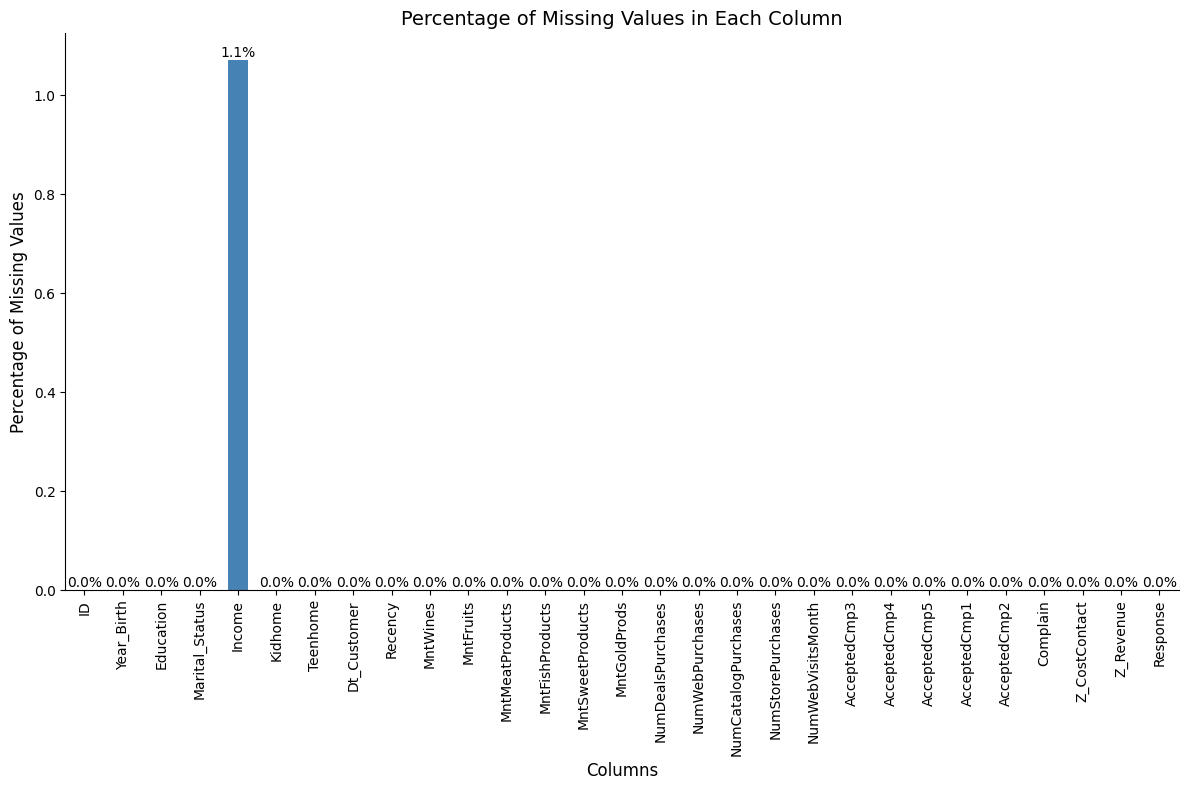

In [171]:
def plot_missing_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Set up the plot
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    # Create a bar plot of the missing percentage
    missing_percentage.plot(kind='bar', ax=ax, color='steelblue')

    # Set the labels and title
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage of Missing Values', fontsize=12)
    plt.title('Percentage of Missing Values in Each Column', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add percentage values above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()
    
plot_missing_percentage(df)

In [172]:
df=df.drop(columns=['ID'])

##### What specific products does the data refer to?

In [173]:
# Renaming the specified columns
column_mapping = {'MntWines': 'Wines',
                  'MntFruits': 'Fruits',
                  'MntMeatProducts': 'Meat',
                  'MntFishProducts': 'Fish',
                  'MntSweetProducts': 'Sweet',
                  'MntGoldProds': 'Gold',
                  'NumDealsPurchases': 'DealsPurchases',
                  'NumWebPurchases': 'Web',
                  'NumCatalogPurchases': 'Catalog',
                  'NumStorePurchases': 'Store',
                  'NumWebVisitsMonth': 'WebVisitsMonth'}

df.rename(columns=column_mapping, inplace=True)

In [174]:
# Create a new column "Total_Expenditure" and sum specified columns for each row
df["Food_Expense"] = df[["Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold"]].sum(axis=1)

In [175]:
products=[ "Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold",'Food_Expense']

In [176]:
df[products]

,Wines,Fruits,Meat,Fish,Sweet,Gold,Food_Expense
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,1341
2236,406,0,30,0,0,8,444
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


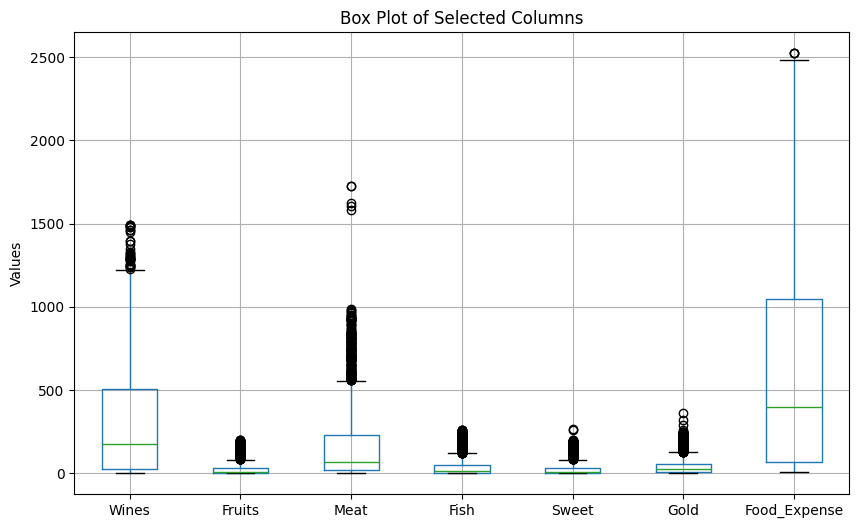

In [177]:
boxplot_multiple_columns(data=df,columns=products)

Food Expense Spending in wines and meats more in general

#### Customer Demographics 

##### Age Profile

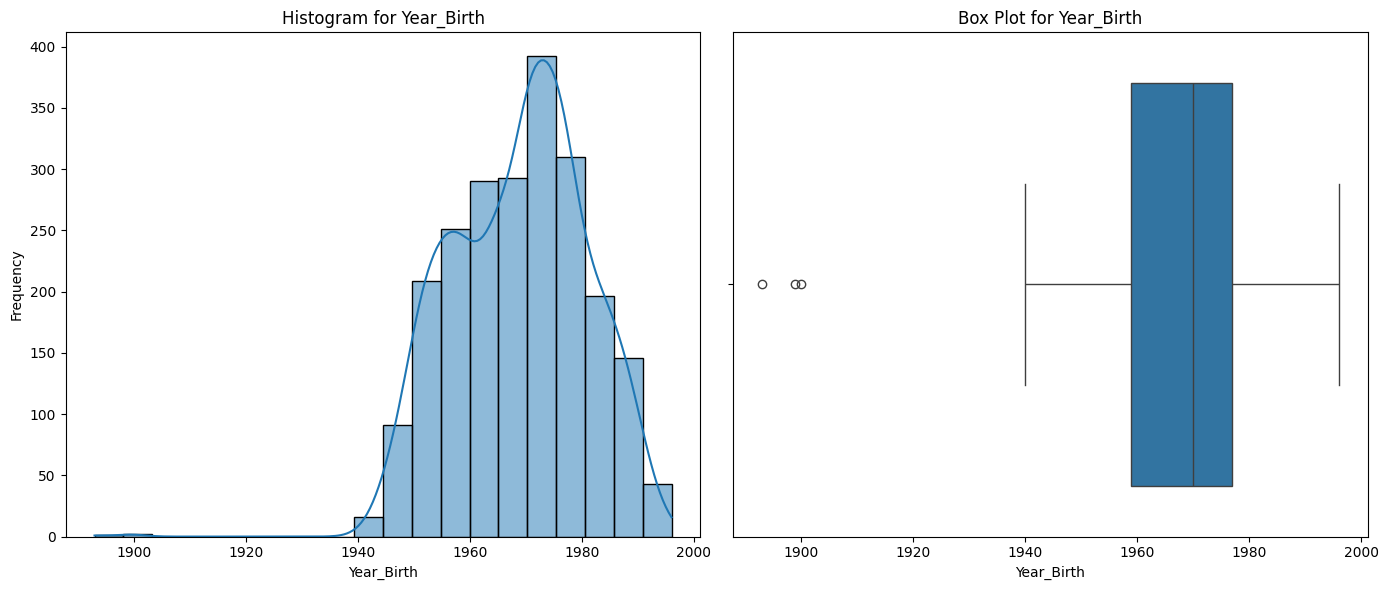

In [178]:
hist_box_plot(data=df, numerical_column='Year_Birth', bin_count=20)

In [179]:
from datetime import datetime

df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')  # Convert to numeric (handling non-numeric values)
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Optional: Drop the original 'Year_of_Birth' column if needed
df = df.drop(columns=['Year_Birth'])

In [180]:


df=remove_outliers(df, column_name='Age', lower_quantile=0.05, upper_quantile=0.99)

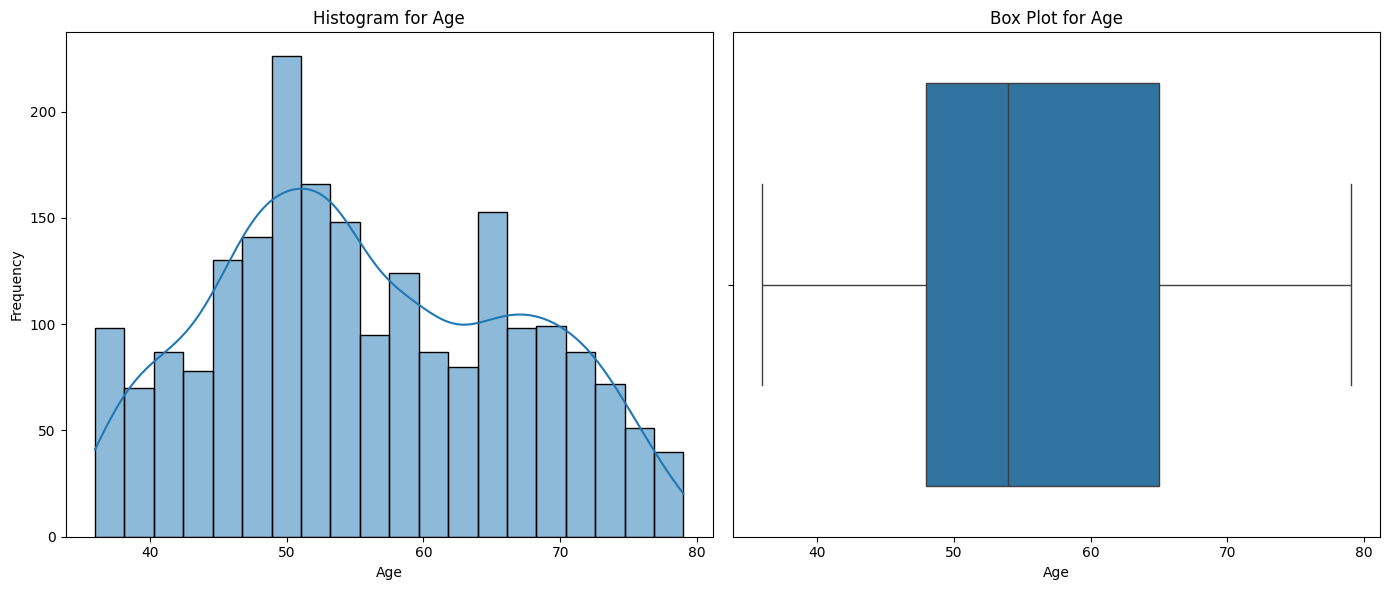

In [181]:
hist_box_plot(data=df, numerical_column='Age', bin_count=20)

- Middle Aged Customers 

The data comprises primarily middle-aged customers, predominantly ranging from 30 to 80 years old

##### Education Qualification

In [182]:
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

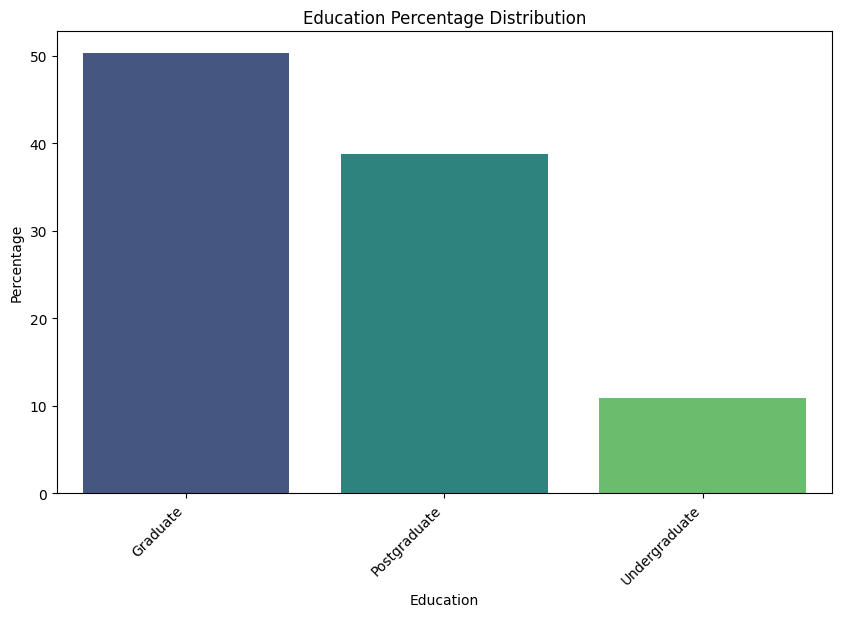

Education: Graduate, Percentage: 50.28%
Education: Postgraduate, Percentage: 38.78%
Education: Undergraduate, Percentage: 10.94%


In [183]:
plot_categorical_distribution(dataframe=df, column_name='Education')

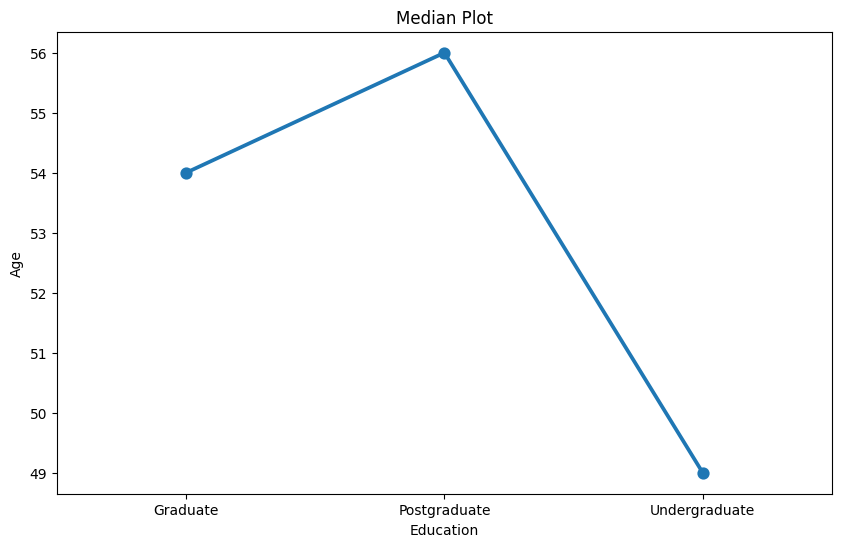

In [184]:
median_plot_categorical_numerical(data=df,categorical_column='Education',numerical_column='Age')

**Median Age and Education Qualifications**

- **Graduation:** Median Age - 53
- **Ph.D.:** Median Age - 56
- **Master's:** Median Age - 54
- **Basic Education:** Median Age - 43
- **2nd Cycle (Assumed):** Median Age - 48

##### Marital Status

In [186]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [187]:
# Deriving Living attributes based on the marital status
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Alone', 'Divorced':'Alone',
                                                'Widow':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

In [190]:
df['Living_With']

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2130, dtype: object

In [159]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Food_Expense', 'Age', 'Living_With'],
      dtype='object')

In [189]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [193]:
# Create a mapping for the merged categories
# Define the updated mapping
marital_status_mapping = {
    'In a Relationship': ['Together', 'Married'],
    'Single': ['Single', 'Alone','Absurd','YOLO'],  # Merge 'Single' and 'Alone'
    'Divorced': ['Divorced'],
    'Widowed': ['Widow']
}

# Create a new column 'merged_marital_status' based on the mapping
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: next(key for key, value in marital_status_mapping.items() if x in value))


StopIteration: 

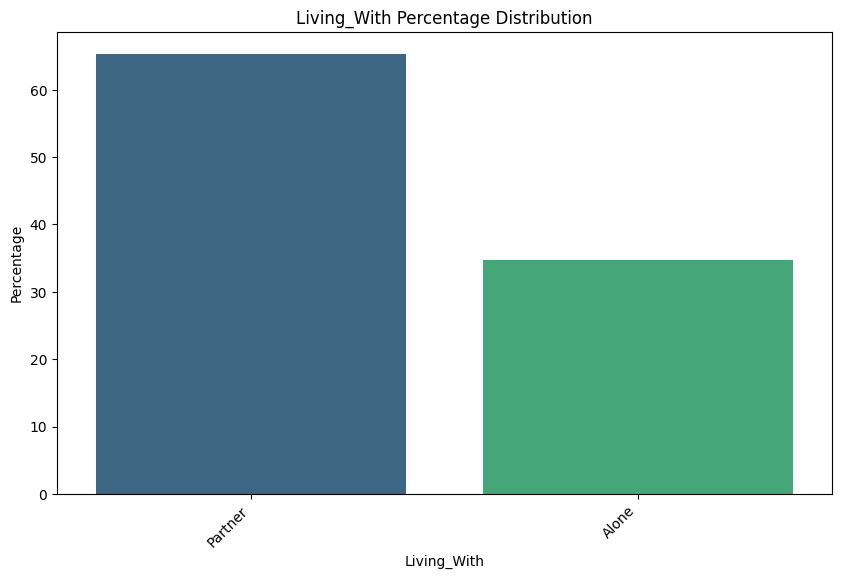

Living_With: Partner, Percentage: 65.31%
Living_With: Alone, Percentage: 34.69%


In [194]:
plot_categorical_distribution(df, column_name='Living_With')

In [195]:
def remove_rows_by_category(data, category_column, categories_to_remove):
    """
    Remove rows with specified categories from a DataFrame.

    Parameters:
    - data: DataFrame
    - category_column: str, the categorical column
    - categories_to_remove: list of str, the categories to be removed
    """
    # Use the "isin" method to filter rows with specified categories
    filtered_data = data[~data[category_column].isin(categories_to_remove)]

    return filtered_data
df=remove_rows_by_category(data=df, category_column='Marital_Status', categories_to_remove=['YOLO','Absurd'])

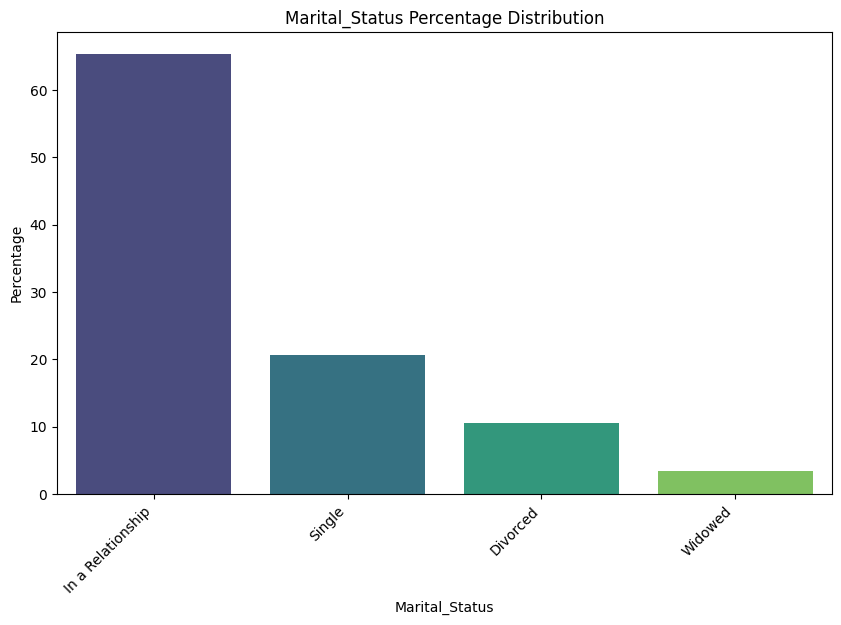

Marital_Status: In a Relationship, Percentage: 65.31%
Marital_Status: Single, Percentage: 20.61%
Marital_Status: Divorced, Percentage: 10.61%
Marital_Status: Widowed, Percentage: 3.47%


In [196]:
plot_categorical_distribution(df, column_name='Marital_Status')

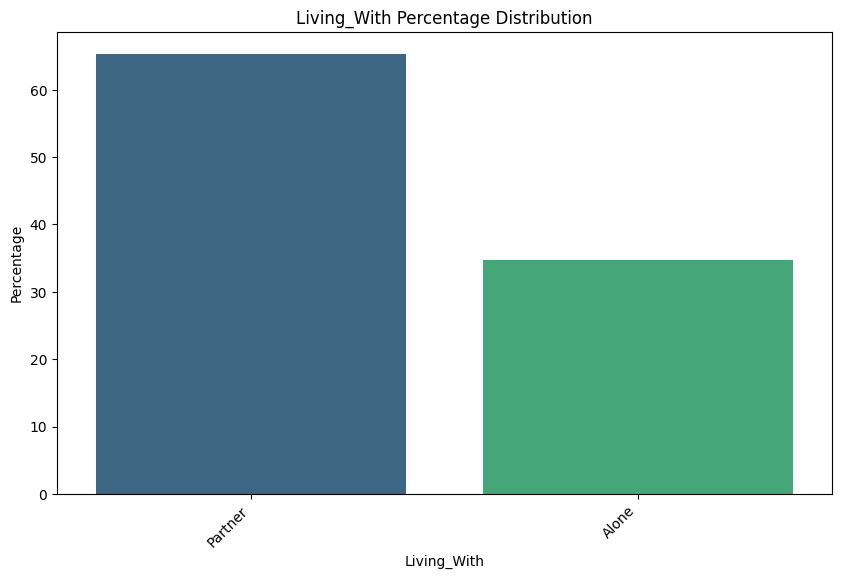

Living_With: Partner, Percentage: 65.31%
Living_With: Alone, Percentage: 34.69%


In [197]:
plot_categorical_distribution(dataframe=df,column_name='Living_With')

##### Offsprings

In [198]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [199]:
df['Total_Offsprings']=df['Kidhome']+df['Teenhome']

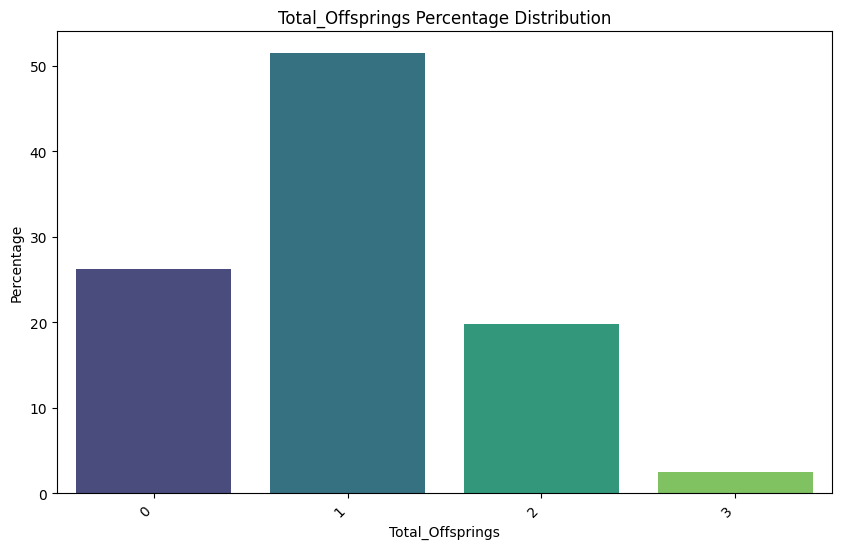

Total_Offsprings: 1, Percentage: 51.46%
Total_Offsprings: 0, Percentage: 26.29%
Total_Offsprings: 2, Percentage: 19.77%
Total_Offsprings: 3, Percentage: 2.49%


In [200]:
plot_categorical_distribution(df,'Total_Offsprings')

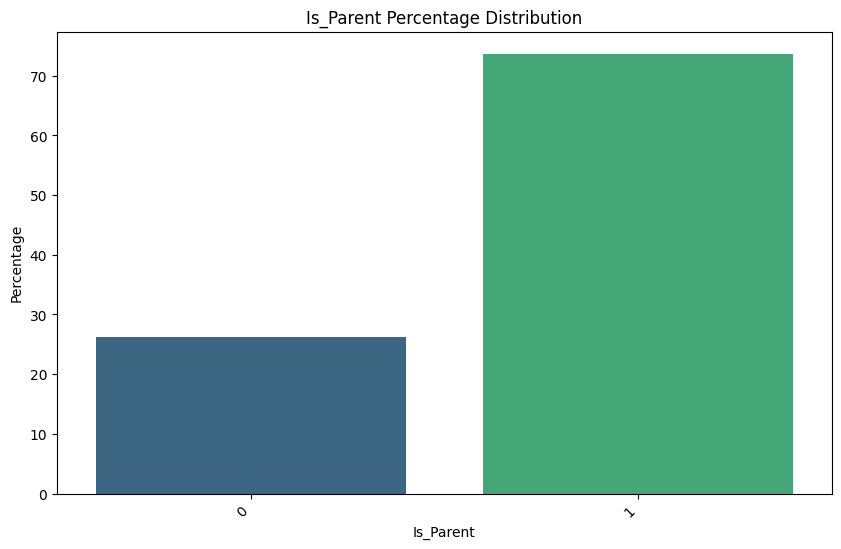

Is_Parent: 1, Percentage: 73.71%
Is_Parent: 0, Percentage: 26.29%


In [201]:
plot_categorical_distribution(df,'Is_Parent')

Is_Parent: 1, Percentage: 73.72%
Is_Parent: 0, Percentage: 26.28%

73.72% are parents in the consumer Data

##### Income

In [202]:
df.shape

(2130, 32)

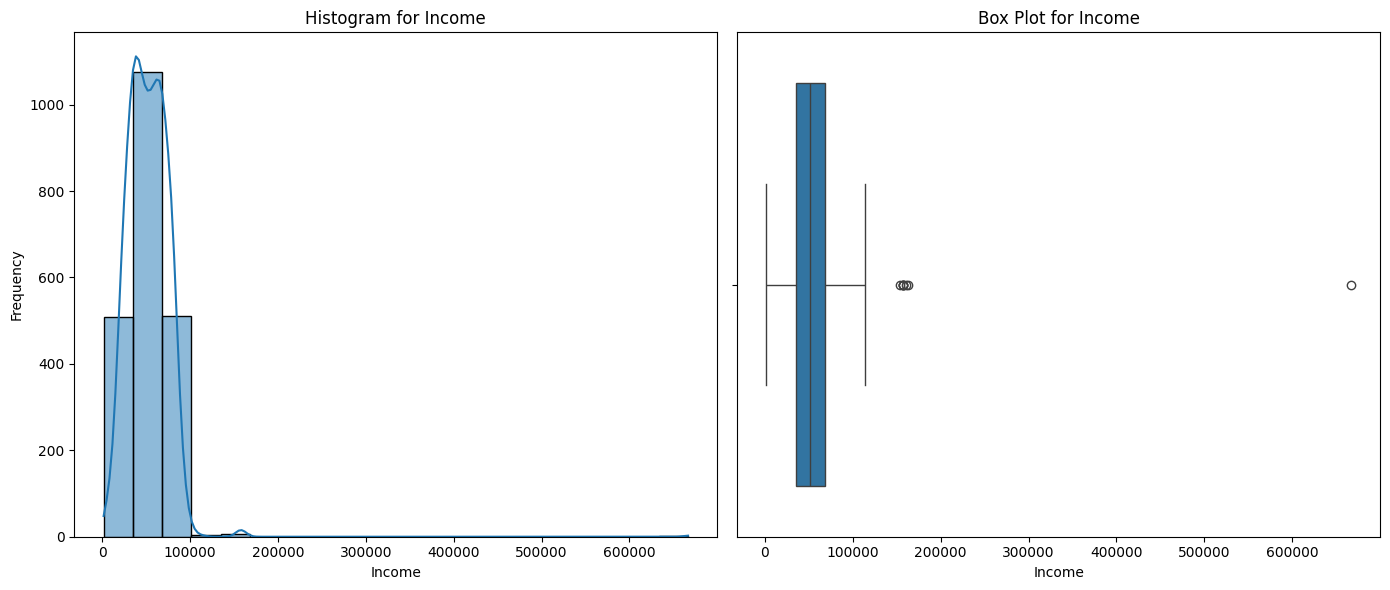

In [203]:
hist_box_plot(data=df,numerical_column='Income')

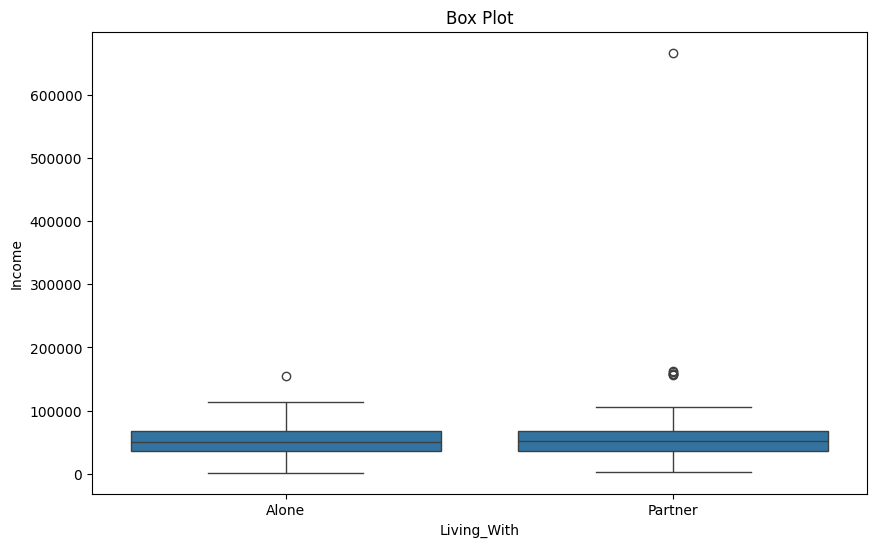

In [204]:
box_plot_categorical_numerical(data=df,categorical_column='Living_With',numerical_column='Income')

People Living with Parterns and Alone have similar variance in income but few high income outliers with customers living with partners 

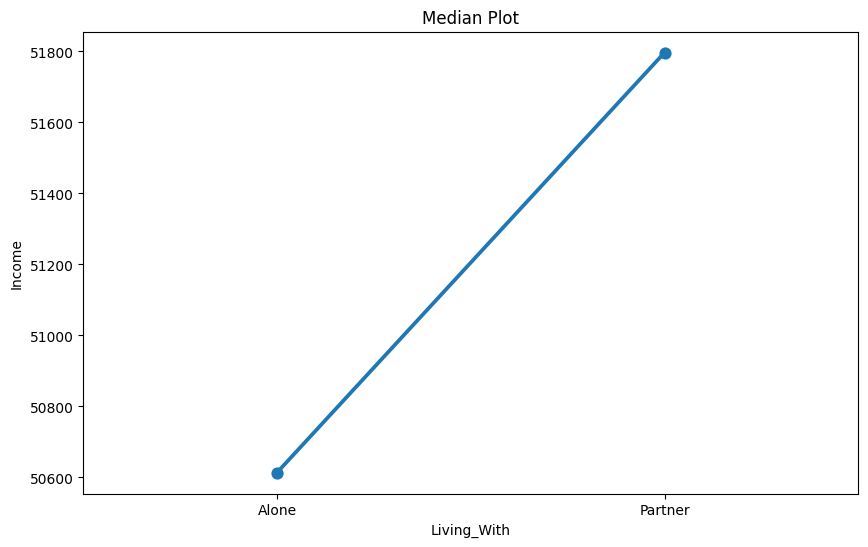

In [205]:
median_plot_categorical_numerical(data=df,categorical_column='Living_With',numerical_column='Income')

Median income of people living Alone has less Income

In [206]:
df['Marital_Status'].unique()

array(['Single', 'In a Relationship', 'Divorced', 'Widowed'], dtype=object)

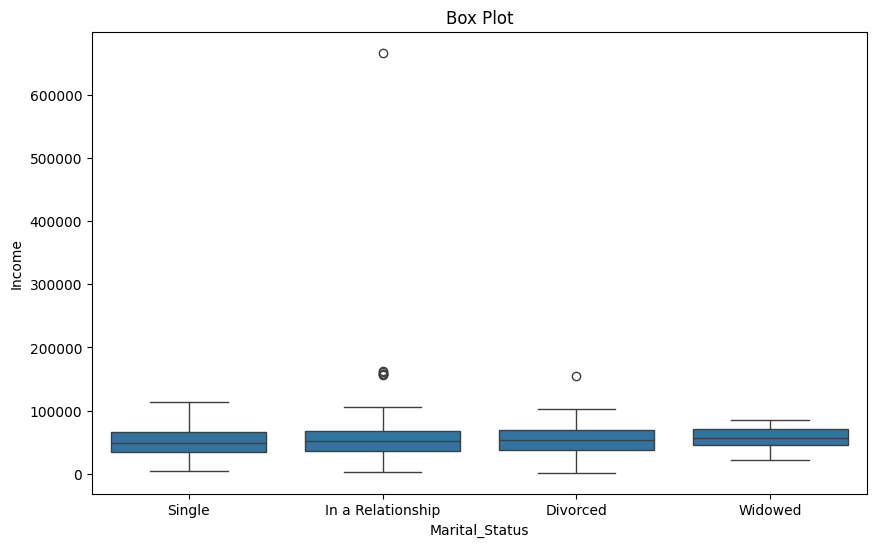

In [207]:
box_plot_categorical_numerical(data=df,categorical_column='Marital_Status',numerical_column='Income')

People in Relationship can be observed to highest income folled by Divorced Customers



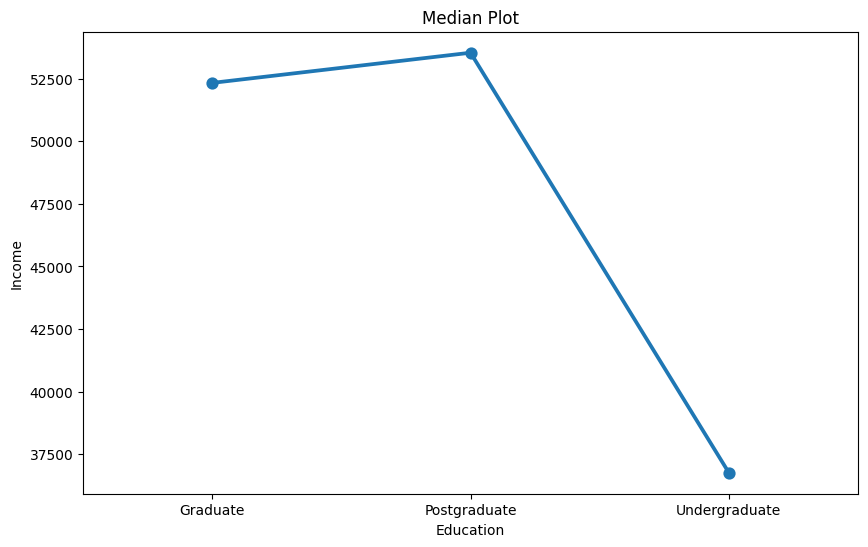

In [208]:
median_plot_categorical_numerical(data=df,categorical_column='Education',numerical_column='Income')

Median Income of Post graduate is highest , Followed by graduate and undergraduate

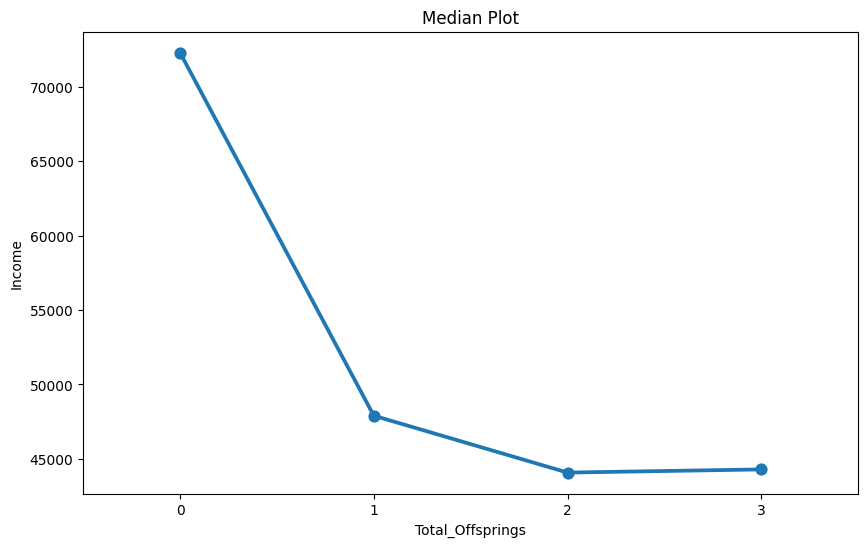

In [209]:
median_plot_categorical_numerical(data=df,categorical_column='Total_Offsprings',numerical_column='Income')

Median Income of the Customers with no Children can be bserved to be highest 

##### Transactions

###### Dates

When do customers conduct transactions according to the data?

In [210]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2130, dtype: object

In [211]:
# Convert 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Check the datatype of the 'Dt_Customer' column
print(df['Dt_Customer'].dtype)

# Extract year, month (as a string), and day and create new columns
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.strftime('%B')  # '%B' gives full month name
df['Day'] = df['Dt_Customer'].dt.day

# Display the DataFrame with the new columns
print(df[['Dt_Customer', 'Year', 'Month', 'Day']])

datetime64[ns]
     Dt_Customer  Year      Month  Day
0     2012-09-04  2012  September    4
1     2014-03-08  2014      March    8
2     2013-08-21  2013     August   21
3     2014-02-10  2014   February   10
4     2014-01-19  2014    January   19
...          ...   ...        ...  ...
2235  2013-06-13  2013       June   13
2236  2014-06-10  2014       June   10
2237  2014-01-25  2014    January   25
2238  2014-01-24  2014    January   24
2239  2012-10-15  2012    October   15

[2130 rows x 4 columns]


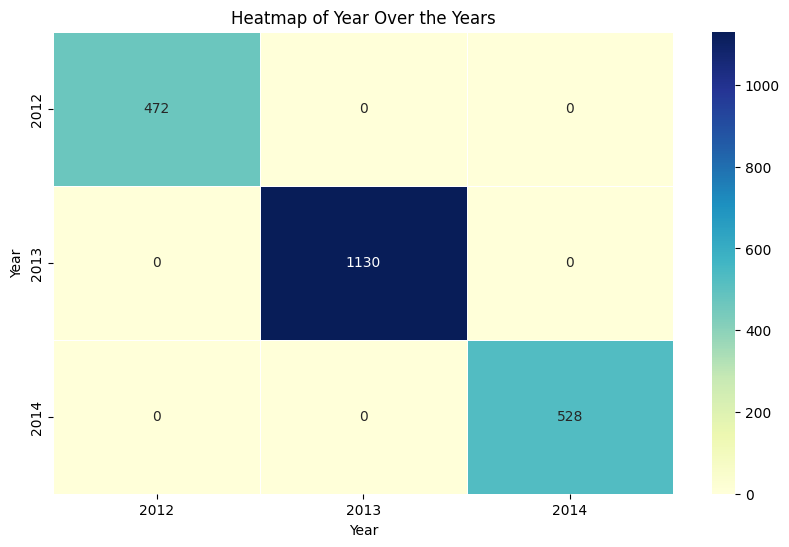

In [212]:
plot_heatmap(df=df,column='Year')

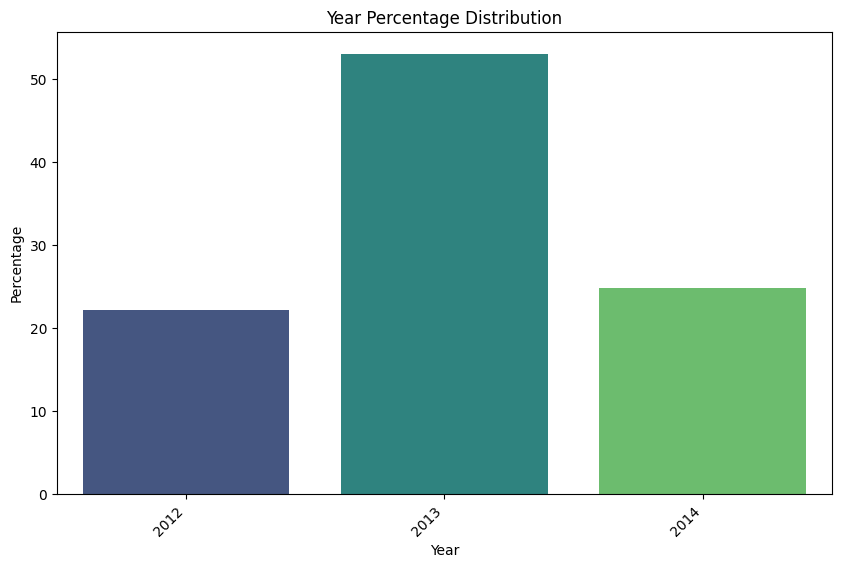

Year: 2013, Percentage: 53.05%
Year: 2014, Percentage: 24.79%
Year: 2012, Percentage: 22.16%


In [213]:
plot_categorical_distribution(dataframe=df,column_name='Year')

We have Incomplete data of year 2012 and 2014 , conisdering year 2013 for generalised understading of customer spending in a complete year

In [214]:
def filter_data_for_year(df, year):
    # Assuming you have a 'year' column in your DataFrame
    if 'Year' in df.columns:
        filtered_df = df[df['Year'] == year].copy()
        return filtered_df
    else:
        print("The DataFrame does not have a 'year' column.")
        
        
df_2013=filter_data_for_year(df, year=2013)

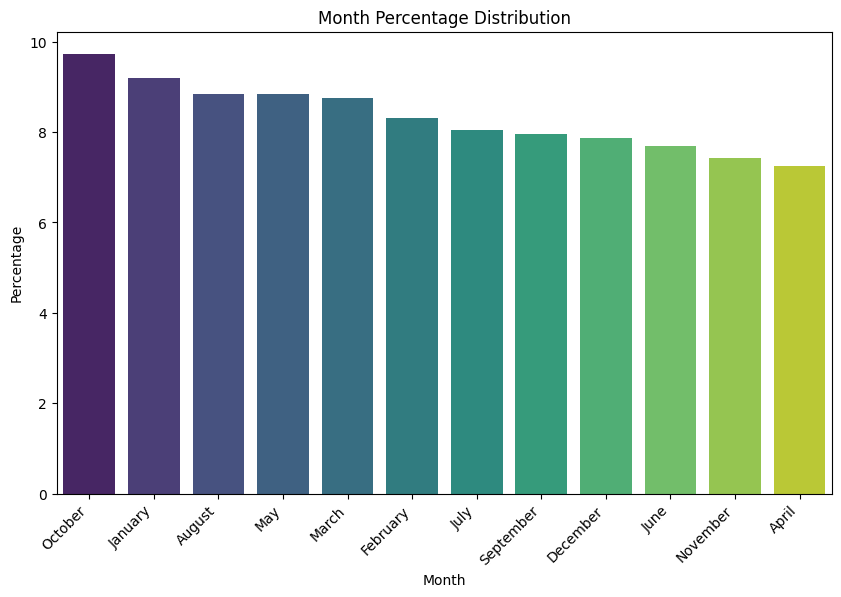

Month: October, Percentage: 9.73%
Month: January, Percentage: 9.20%
Month: August, Percentage: 8.85%
Month: May, Percentage: 8.85%
Month: March, Percentage: 8.76%
Month: February, Percentage: 8.32%
Month: July, Percentage: 8.05%
Month: September, Percentage: 7.96%
Month: December, Percentage: 7.88%
Month: June, Percentage: 7.70%
Month: November, Percentage: 7.43%
Month: April, Percentage: 7.26%


In [215]:
plot_categorical_distribution(dataframe=df_2013,column_name='Month')

Spending can be observed more in Month of October

In [216]:
def assign_seasons(df):
    # Assuming you have a 'month' column in your DataFrame
    if 'Month' in df.columns:
        # Map month names to seasons
        month_to_season = {
            'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
            'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
            'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
            'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
        }

        # Create a new 'season' column
        df['season'] = df['Month'].map(month_to_season)

        return df
    else:
        print("The DataFrame does not have a 'Month' column.")
        
        
df_2013=assign_seasons(df_2013)

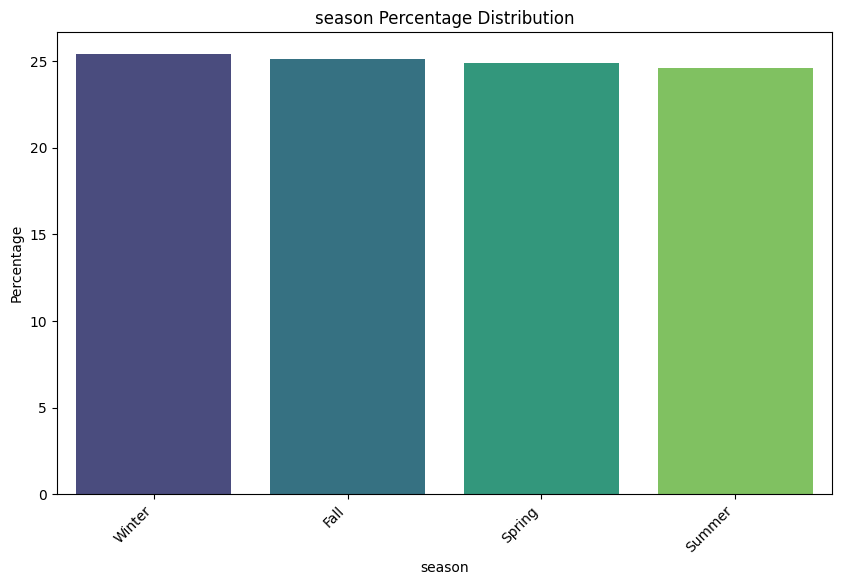

season: Winter, Percentage: 25.40%
season: Fall, Percentage: 25.13%
season: Spring, Percentage: 24.87%
season: Summer, Percentage: 24.60%


In [217]:
plot_categorical_distribution(dataframe=df_2013,column_name='season')

In [218]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Food_Expense', 'Age', 'Living_With', 'Is_Parent', 'Total_Offsprings',
       'Year', 'Month', 'Day'],
      dtype='object')

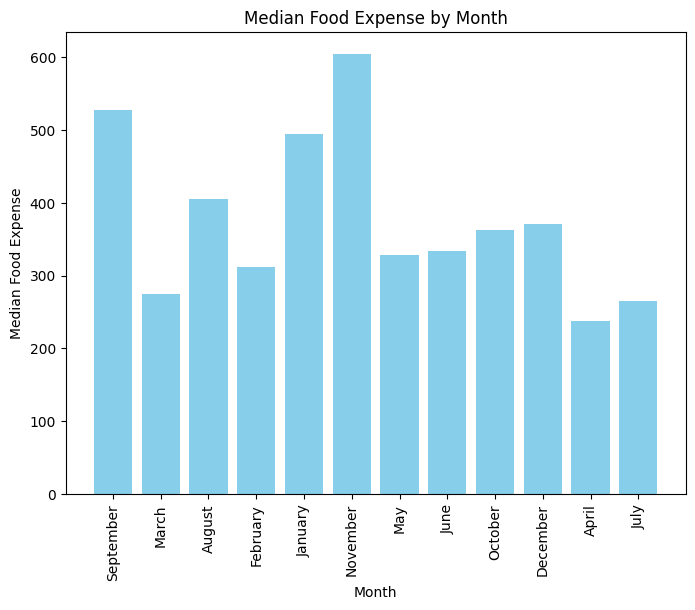

In [219]:
# Group by 'Month' and calculate the median for each group
median_expense_by_month = df.groupby('Month')['Food_Expense'].median().reset_index()

# Convert 'Month' to categorical to ensure correct ordering in the plot
unique_months = df['Month'].unique()
median_expense_by_month['Month'] = pd.Categorical(median_expense_by_month['Month'], categories=unique_months, ordered=True)

# Sort the DataFrame by the order of unique months
median_expense_by_month = median_expense_by_month.sort_values('Month')

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(median_expense_by_month['Month'], median_expense_by_month['Food_Expense'], color='skyblue')
plt.title('Median Food Expense by Month')
plt.xlabel('Month')
plt.ylabel('Median Food Expense')
# Rotate x-axis ticks by 90 degrees
plt.xticks(rotation=90)
plt.show()

November can be seen with highest median amount of  purchase of customers in 2013 year

##### Expenditure of the products

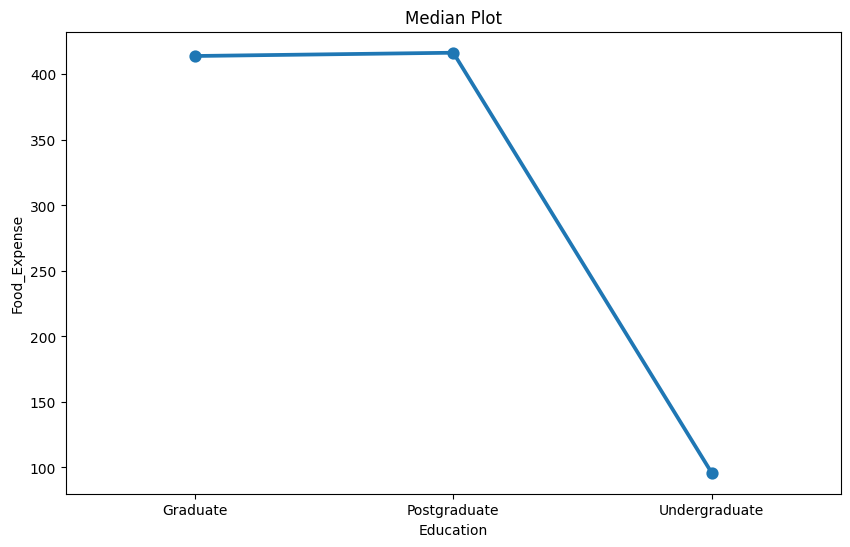

In [220]:
median_plot_categorical_numerical(data=df,numerical_column='Food_Expense',categorical_column='Education')

Undergraduate popluation has the least Expense on Food items 

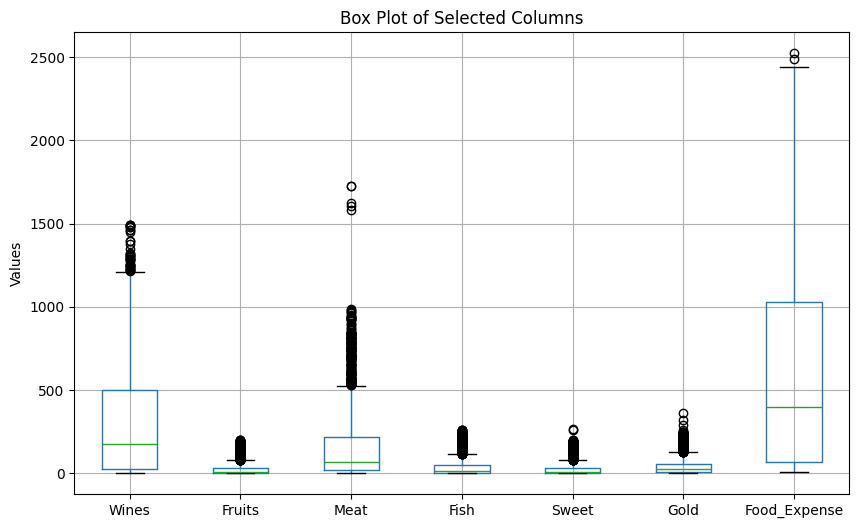

In [221]:
boxplot_multiple_columns(data=df,columns=products)

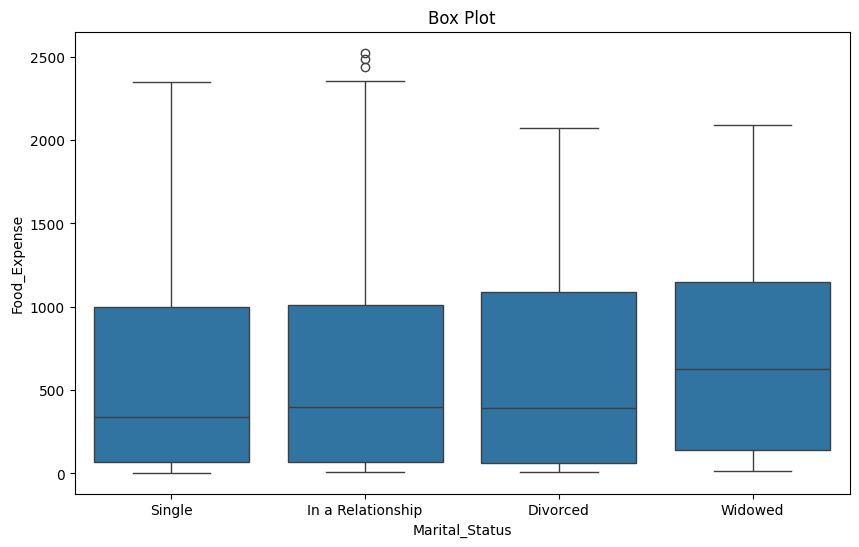

In [222]:
box_plot_categorical_numerical(data=df,categorical_column='Marital_Status',numerical_column='Food_Expense')

- variance of Expenditure 

Food expense of people living alone can be observed to be least followed by Divorced and then widowed Customers

Highest for Married People

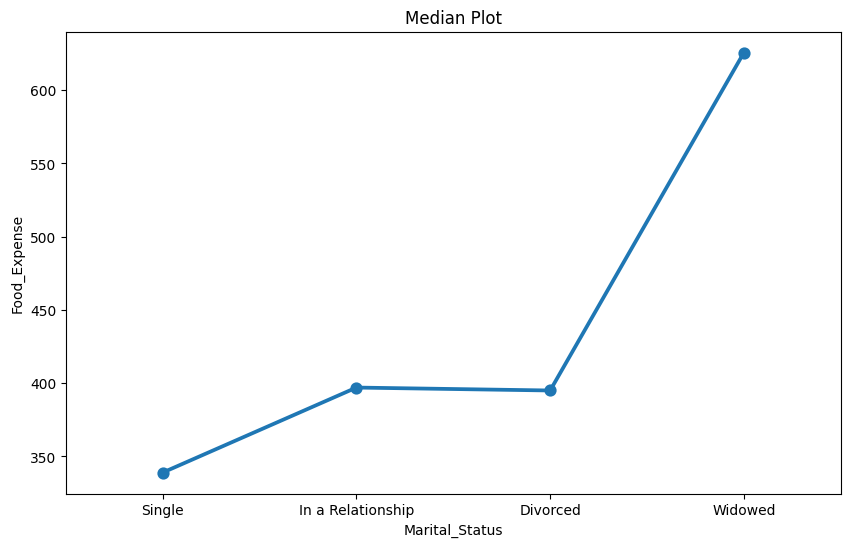

In [223]:
median_plot_categorical_numerical(data=df,numerical_column='Food_Expense',categorical_column='Marital_Status')

Median Expenditure of Windowed Customers is observed to be highest and least for Alone people

In [224]:
# Filter the DataFrame based on the selected category
filtered_df = df[df['Marital_Status'] == 'Widow']

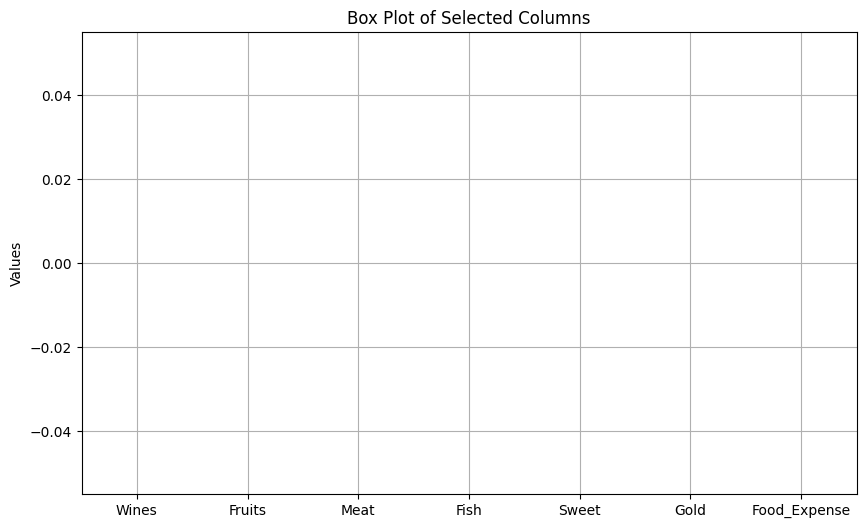

In [225]:
boxplot_multiple_columns(data=filtered_df,columns=products)

Widowed Customers with hightest median expense ten to tspenf most on Wines foloowed by meat 

Deals 

In [226]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Food_Expense', 'Age', 'Living_With', 'Is_Parent', 'Total_Offsprings',
       'Year', 'Month', 'Day'],
      dtype='object')

In [227]:
deals=['WebVisitsMonth','DealsPurchases']

#### Purchase Channel 

In [228]:
purchase_medium=['Web', 'Catalog', 'Store']

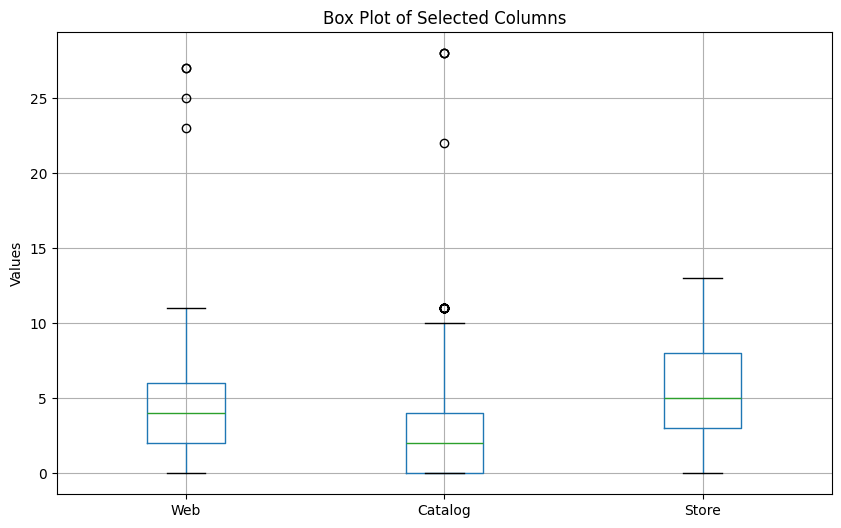

In [229]:
boxplot_multiple_columns(df,purchase_medium)

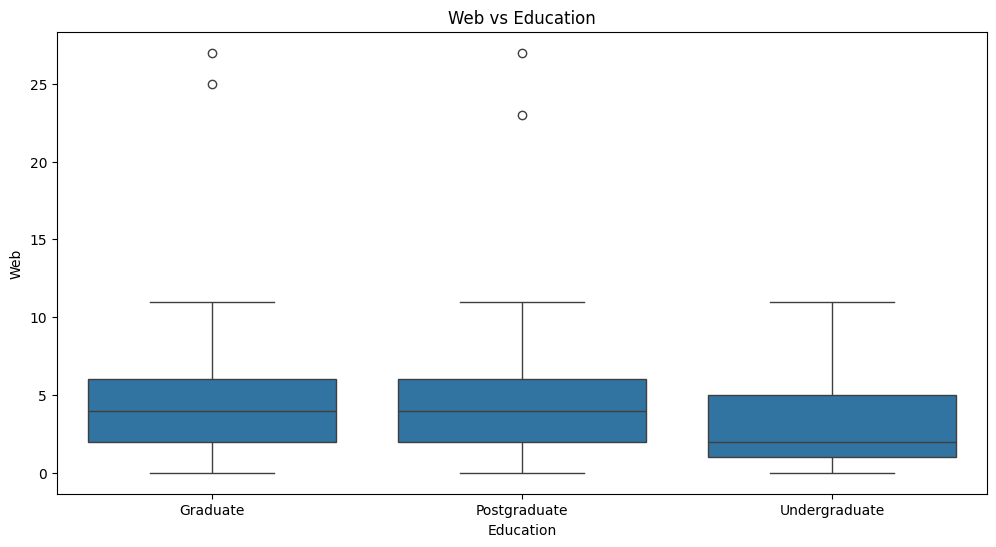

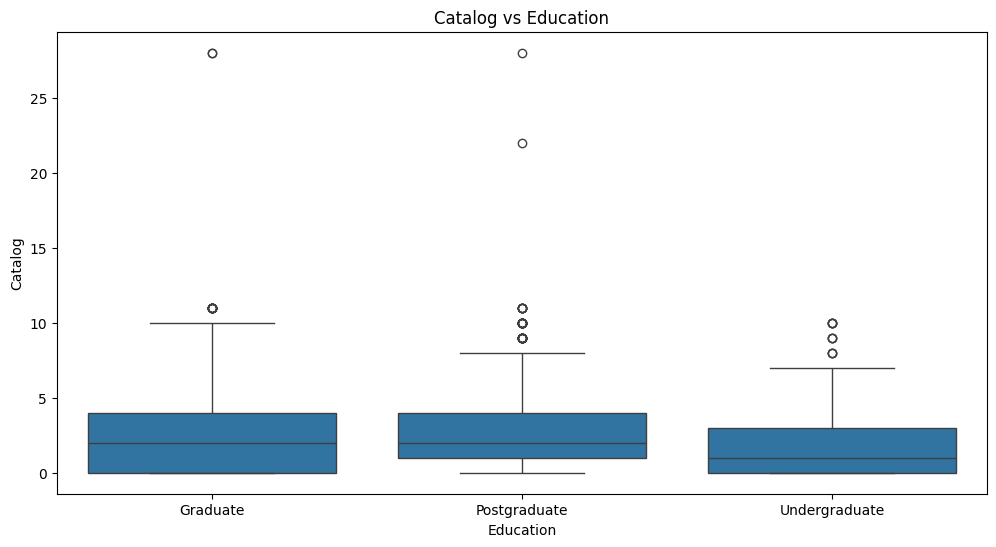

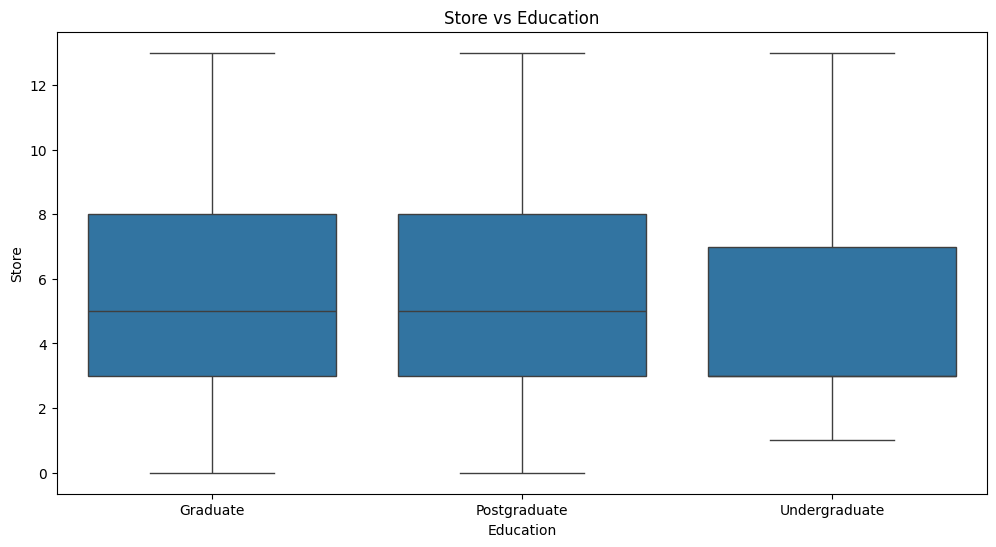

In [230]:
def plot_categorical_vs_numerical(data, categorical_column, numerical_column):
    """
    Plot a numerical column against a categorical column.

    Parameters:
    - data: pandas DataFrame
    - categorical_column: str, the categorical column for which to create plots
    - numerical_column: str, the numerical column to be plotted against the categorical column

    Returns:
    - None (displays the plot)
    """

    # Set up the plotting area
    plt.figure(figsize=(12, 6))

    # Create a boxplot for the numerical column against the categorical column
    sns.boxplot(x=categorical_column, y=numerical_column, data=data)
    
    # Set plot labels and title
    plt.title(f'{numerical_column} vs {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)

    # Show the plot
    plt.show()
    
for column in purchase_medium:
        
    plot_categorical_vs_numerical(data=df, categorical_column='Education', numerical_column=column)

Ingeneral Undergraduate has least median purches from all purchsing channels 

Post graduates and graduates has the highest median purches across all purchsing channels higher than ndergraduates

In [231]:
# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['Web'] / (df['Web'] + df['Catalog'] + df['Store'])

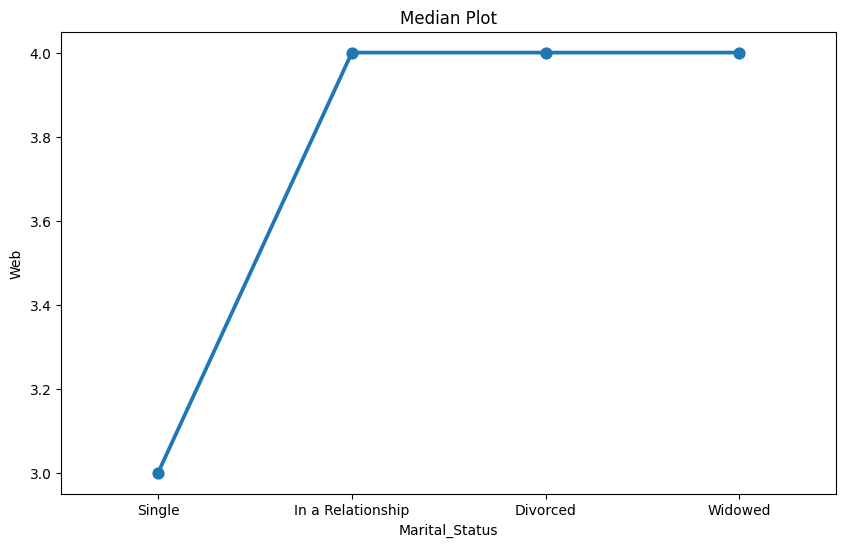

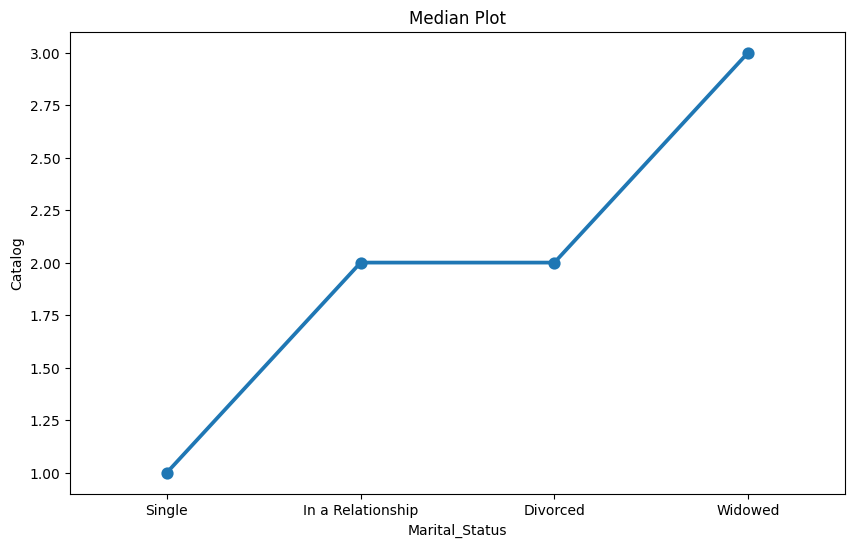

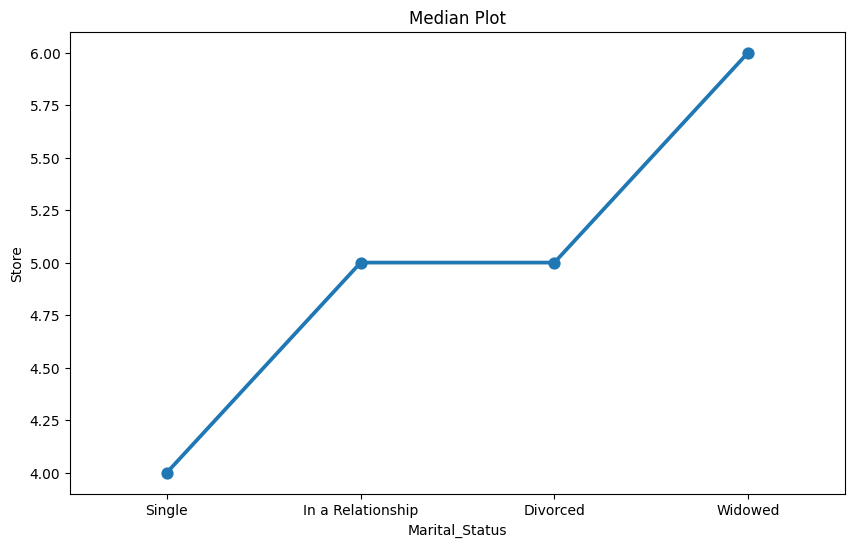

In [232]:
for column in purchase_medium:
        
    median_plot_categorical_numerical(data=df, categorical_column='Marital_Status', numerical_column=column)

Ass overall expense of widnowed cutomer base is highest can be observed in general dominant from all customer channels and alsone has the least median exense from all channels 

Dropping Irrelevant Columns

In [233]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year']
df = df.drop(to_drop, axis=1)

In [236]:
df=df.drop(columns=['Kidhome', 'Teenhome'])

In [237]:
columns=[ 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

df=df.drop(columns=columns)

In [239]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet', 'Gold', 'DealsPurchases', 'Web', 'Catalog',
       'Store', 'WebVisitsMonth', 'Complain', 'Response', 'Food_Expense',
       'Age', 'Living_With', 'Is_Parent', 'Total_Offsprings', 'Month', 'Day',
       'online_purchase_ratio'],
      dtype='object')

In [240]:
columns=[ 'Month', 'Day']
df=df.drop(columns=columns)

In [234]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
       'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Food_Expense', 'Age',
       'Living_With', 'Is_Parent', 'Total_Offsprings', 'Month', 'Day',
       'online_purchase_ratio'],
      dtype='object')

##### Save Csv 

In [241]:
def save_dataframe_to_csv(dataframe, folder_name, csv_name):
    """
    Save a DataFrame to a CSV file in the specified folder.

    Parameters:
    - dataframe: pandas DataFrame
    - folder_name: str, name of the folder to save the CSV file
    - csv_name: str, name of the CSV file

    Returns:
    - None
    """
    # Check if the folder exists, if not, create it
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Construct the full path to the CSV file
    csv_path = os.path.join(folder_name, csv_name)

    # Save the DataFrame to CSV
    dataframe.to_csv(csv_path, index=False)
save_dataframe_to_csv(dataframe=df, folder_name="Transformed_Data", csv_name='EDA.csv')